### Exploratory Data Analysis

### Data Pre-Processing

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [ ]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)




*   In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.
*   Date is also not useful because we already have season column which is also almost equal to date.


*   City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.
*   'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.





In [ ]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [ ]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [ ]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [ ]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [ ]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [ ]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [ ]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64




*   Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.
*   Filling player_dismissed null values with 'No wicket', didmissal_Kind null values with also No Wicket.



In [ ]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [ ]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### Q1) Who will win today match KXIP vs RR?

In [ ]:
#First Lets see head-head results
df_KKR_KXIP = df_matches[((df_matches['team1'] == 'Kings XI Punjab') | (df_matches['team1'] == 'Rajasthan Royals')) & 
                        ((df_matches['team2'] == 'Kings XI Punjab') | (df_matches['team2'] == 'Rajasthan Royals'))] 

#plotting RR and KXIP wins against each other
import plotly.graph_objs as go
df_winner = df_KKR_KXIP[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by KXIP and RR against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

Rajasthan won 10 matches and Punjab won 9 matches. So there not much difference.

Lets look at individual players perfomance from both teams.

In [ ]:
#Lets look at how many player of the match awards won by current RR and KXIP players.
#Note: I am taking top 8 palyers from both teams
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.
df_man_of_match_KXIP = df_matches[(df_matches['player_of_match'] == 'KL Rahul') | (df_matches['player_of_match'] == 'MA Agarwal') |
                                (df_matches['player_of_match'] == 'GJ Maxwell') | (df_matches['player_of_match'] == 'CH Gayle') |
                                (df_matches['player_of_match'] == 'Mohammed Shami') | (df_matches['player_of_match'] == 'Mandeep Singh') |
                                (df_matches['player_of_match'] == 'CJ Jordan') | (df_matches['player_of_match'] == 'M Ashwin') ]

print("Total number of man of matches won by present Punjab players is", df_man_of_match_KXIP.shape[0],'\n')

df_man_of_match_RR = df_matches[(df_matches['player_of_match'] == 'SV Samson') | (df_matches['player_of_match'] == 'BA Stokes') |
                                (df_matches['player_of_match'] == 'RV Uthappa') | (df_matches['player_of_match'] == 'JC Buttler') |
                                (df_matches['player_of_match'] == 'SPD Smith') | (df_matches['player_of_match'] == 'S Gopal') |
                                (df_matches['player_of_match'] == 'J Archer') | (df_matches['player_of_match'] == 'R Tewatia')] 


print("Total number of man of matches won by present Rajasthan players is", df_man_of_match_RR.shape[0])    


Total number of man of matches won by present Punjab players is 36 

Total number of man of matches won by present Rajasthan players is 28


**Conclusion :-**
 

*   KXIP players won more man of the match awards than RR players. 
*   So i can say KXIP has more match winners than RR. As per my cricket knowledge if you have more match winners than you have higher chances of winning.





I am predicting KXIP will win today match.

### Q2) Which batsman will have the highest number of runs scored through boundaries to total runs scored ratio in the match?

I am calculating ratio for all batsman who are played in last match for their respective sides.This question is about players, So most of the players will change team every two years. i.e why i am considering all the matches they played not only KXIP VS RR matches.

In [45]:
#Taking 5 batsman from each team
df_batsmans_KXIPRR = df_deliveries[(df_deliveries['batsman'] == 'KL Rahul') | (df_deliveries['batsman'] == 'CH Gayle') |
                                 (df_deliveries['batsman'] == 'GJ Maxwell') | (df_deliveries['batsman'] == 'Mandeep Singh') |
                                 (df_deliveries['batsman'] == 'N Pooran') | (df_deliveries['batsman'] == 'SPD Smith') |
                                 (df_deliveries['batsman'] == 'SV Samson') | (df_deliveries['batsman'] == 'BA Stokes') |
                                 (df_deliveries['batsman'] == 'RV Uthappa') | (df_deliveries['batsman'] == 'JC Buttler')]

#First calcualting total runs scored by every batsman in all matches 
total_runs = df_batsmans_KXIPRR.groupby('batsman')['batsman_runs'].sum()
df_total_runs = total_runs.to_frame().reset_index()
df_total_runs.rename(columns = {'batsman_runs':'total_runs'}, inplace = True) 
df_total_runs.head(10)

,batsman,total_runs
0,BA Stokes,647
1,CH Gayle,4560
2,GJ Maxwell,1403
3,JC Buttler,1431
4,KL Rahul,2013
5,Mandeep Singh,1547
6,N Pooran,177
7,RV Uthappa,4446
8,SPD Smith,2047
9,SV Samson,2235


In [ ]:
#Now taking only 4's and 6's rows from above dataframe
#I saw in dataset some rows showing batsman runs = 5 or 7 but we dont know weather these runs are coming from boundaries or not.
#So i am considering those rows as outliers and taking only 4 and 6.

df_4s6s = df_batsmans_KXIPRR[(df_batsmans_KXIPRR['batsman_runs'] == 4) | (df_batsmans_KXIPRR['batsman_runs'] == 6)]

boundaries_runs = df_4s6s.groupby('batsman')['batsman_runs'].sum()
df_boundaries_runs = boundaries_runs.to_frame().reset_index()
df_boundaries_runs.rename(columns = {'batsman_runs':'boundaries_runs'}, inplace = True) 
df_boundaries_runs.head(10)

,batsman,boundaries_runs
0,BA Stokes,322
1,CH Gayle,3466
2,GJ Maxwell,986
3,JC Buttler,938
4,KL Rahul,1198
5,Mandeep Singh,842
6,N Pooran,128
7,RV Uthappa,2680
8,SPD Smith,1018
9,SV Samson,1218


In [ ]:
#Now first merging above dataframes then calculating ratio for each batsman
df_ratio = pd.merge(df_boundaries_runs, df_total_runs, left_on='batsman',right_on='batsman', how='outer')

df_ratio['ratio'] = df_ratio['boundaries_runs'] / df_ratio['total_runs']
df_ratio.head(10)

,batsman,boundaries_runs,total_runs,ratio
0,BA Stokes,322,647,0.497682
1,CH Gayle,3466,4560,0.760088
2,GJ Maxwell,986,1403,0.702780
3,JC Buttler,938,1431,0.655486
4,KL Rahul,1198,2013,0.595132
5,Mandeep Singh,842,1547,0.544279
6,N Pooran,128,177,0.723164
7,RV Uthappa,2680,4446,0.602789
8,SPD Smith,1018,2047,0.497313
9,SV Samson,1218,2235,0.544966


**Conclusion :-**
 

*   
By looking at above ratio column i can say chris gayle has highest boundary runs to total runs ratio.
*   Chris Gayle also scored most runs among batsmans. So 76% of the runs through boundaries out of 4500 runs means he is likely to hit more boundaries then 1s,2s,3s.

So i am predicting in  today match also chris gayle have the highest boundary runs to total runs ratio.



### Q3) Which batsman or bowler has highest overall player perfomance(opp)?

In [58]:
import functools 
#First calculating batsman opp
#Filtering all RR and KXIP batsman and all rounders who can bat.
df_batsmans = df_deliveries[(df_deliveries['batsman'] == 'KL Rahul') | (df_deliveries['batsman'] == 'CH Gayle') |
                            (df_deliveries['batsman'] == 'GJ Maxwell') | (df_deliveries['batsman'] == 'Mandeep Singh') |
                            (df_deliveries['batsman'] == 'N Pooran') | (df_deliveries['batsman'] == 'SPD Smith') |
                            (df_deliveries['batsman'] == 'SV Samson') | (df_deliveries['batsman'] == 'BA Stokes') |
                            (df_deliveries['batsman'] == 'RV Uthappa') | (df_deliveries['batsman'] == 'JC Buttler') |
                            (df_deliveries['batsman'] == 'R Tewatia')]
  
#Calculating each batsman runs in each match they played                        
batsman_runs = df_batsmans.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].sum()

#Calculating number of balls they faced
df_ballsfaced = df_batsmans[(df_batsmans['wide_runs'] == 0) & (df_batsmans['noball_runs'] == 0)]
balls_faced = df_ballsfaced.groupby(['match_id','batsman'],as_index=False)['ball'].count()

#Calculating number of runs they scored through boundaries
df_boundary_runs = df_batsmans[(df_batsmans['batsman_runs'] == 4) | (df_batsmans['batsman_runs'] == 6)]
boundary_runs = df_boundary_runs.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].sum()
boundary_runs.rename(columns={'batsman_runs':'boundary_runs'}, inplace=True)

#Calculating number of runs they scored through 1s,2s ans 3s.
df_123s_runs = df_batsmans[(df_batsmans['batsman_runs'] == 1) | (df_batsmans['batsman_runs'] == 2) | (df_batsmans['batsman_runs'] == 3)]
singles2s3s_runs = df_123s_runs.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].sum()
singles2s3s_runs.rename(columns={'batsman_runs':'1s2s3s_runs'}, inplace=True)

#Now we can merge above all dataframes
dfs = [batsman_runs, balls_faced, boundary_runs, singles2s3s_runs]
df_batsman_OPP = functools.reduce(lambda left,right: pd.merge(left,right,on=['match_id','batsman']), dfs)


#Now calculating OPP for each batsman in each match they played
df_batsman_OPP['OPP'] = (df_batsman_OPP['batsman_runs'] / df_batsman_OPP['ball']) + (df_batsman_OPP['boundary_runs']) - ((df_batsman_OPP['1s2s3s_runs'])/(df_batsman_OPP['ball']))

df_batsman_OPP.head()

,match_id,batsman,batsman_runs,ball,boundary_runs,1s2s3s_runs,OPP
0,1,CH Gayle,32,21,26,6,27.238095
1,1,Mandeep Singh,24,16,20,4,21.250000
2,2,BA Stokes,21,14,12,9,12.857143
3,2,JC Buttler,38,19,30,3,31.842105
4,2,SPD Smith,84,54,46,38,46.851852


In [59]:
#Now i am taking mean of OPP of each batsman
OPP_avg_batsman = df_batsman_OPP.groupby('batsman',as_index=False)['OPP'].mean()
OPP_avg_batsman.head(11)

,batsman,OPP
0,BA Stokes,15.101385
1,CH Gayle,35.092305
2,GJ Maxwell,23.092549
3,JC Buttler,25.758557
4,KL Rahul,24.137946
5,Mandeep Singh,16.300956
6,N Pooran,26.875758
7,R Tewatia,8.107295
8,RV Uthappa,20.502318
9,SPD Smith,18.756375


In [60]:
#Normalising OPP by using given formula of each batsman
OPP_avg_batsman['normalised_OPP'] = (OPP_avg_batsman['OPP'] - OPP_avg_batsman['OPP'].min()) / (OPP_avg_batsman['OPP'].max() - OPP_avg_batsman['OPP'].min())
OPP_avg_batsman.head(10)

,batsman,OPP,normalised_OPP
0,BA Stokes,15.101385,0.259184
1,CH Gayle,35.092305,1.000000
2,GJ Maxwell,23.092549,0.555318
3,JC Buttler,25.758557,0.654114
4,KL Rahul,24.137946,0.594058
5,Mandeep Singh,16.300956,0.303637
6,N Pooran,26.875758,0.695514
7,R Tewatia,8.107295,0.000000
8,RV Uthappa,20.502318,0.459330
9,SPD Smith,18.756375,0.394629


In [93]:
#Now calculating OPP for bowlers. Taking KXIP and RR bowlers and all rounders who can bowl
df_bowlers = df_deliveries[(df_deliveries['bowler'] == 'J Archer') | (df_deliveries['bowler'] == 'S Gopal') |
                           (df_deliveries['bowler'] == 'BA Stokes') | (df_deliveries['bowler'] == 'R Tewatia') |
                           (df_deliveries['bowler'] == 'Mohammed Shami') | (df_deliveries['bowler'] == 'M Ashwin') |
                           (df_deliveries['bowler'] == 'GJ Maxwell') | (df_deliveries['bowler'] == 'CJ Jordan') ]

#Calculating number of balls bowled by bowler in each match
df_balls = df_bowlers[(df_bowlers['wide_runs'] == 0) & (df_bowlers['noball_runs'] == 0)]
balls_bowled =  df_balls.groupby(['match_id','bowler'])['ball'].count() 
balls_bowled = balls_bowled.to_frame().reset_index() 
balls_bowled.rename(columns={'ball':'no_of_balls'}, inplace=True)                       

#Calculating number of boundary runs given
df_boundaries = df_bowlers[(df_bowlers['batsman_runs'] == 4) | (df_bowlers['batsman_runs'] == 6)]
boundary_runs_given = df_boundaries.groupby(['match_id','bowler'], as_index=False)['batsman_runs'].sum()
boundary_runs_given.rename(columns={'batsman_runs':'boundary_runs_given'}, inplace=True)

#Calculating number of boundaries given
boundaries_given = df_boundaries.groupby(['match_id','bowler'], as_index=False)['batsman_runs'].count()
boundaries_given.rename(columns={'batsman_runs':'boundaries_given'}, inplace=True)

#Now we can merge above all dataframes
dfs = [balls_bowled, boundary_runs_given, boundaries_given]
df_bowler_OPP = functools.reduce(lambda left,right: pd.merge(left,right,on=['match_id','bowler']), dfs)

#Now calculating OPP for each bowler in each match they played
df_bowler_OPP['OPP'] = ((df_bowler_OPP['boundary_runs_given'] / df_bowler_OPP['boundaries_given'])) / (df_bowler_OPP['no_of_balls'])
df_bowler_OPP.head()

,match_id,bowler,no_of_balls,boundary_runs_given,boundaries_given,OPP
0,2,BA Stokes,24,24,4,0.250000
1,4,BA Stokes,24,22,5,0.183333
2,9,BA Stokes,24,28,6,0.194444
3,11,GJ Maxwell,6,16,4,0.666667
4,13,BA Stokes,18,8,2,0.222222


In [94]:
#Now i am taking mean of OPP of each bowler
OPP_avg_bowler = df_bowler_OPP.groupby('bowler',as_index=False)['OPP'].mean()
OPP_avg_bowler.head(8)

,bowler,OPP
0,BA Stokes,0.246173
1,CJ Jordan,0.358065
2,GJ Maxwell,0.608165
3,J Archer,0.201422
4,M Ashwin,0.275529
5,Mohammed Shami,0.236884
6,R Tewatia,0.348448
7,S Gopal,0.284629


In [95]:
#Normalising OPP by using given formula of each bowler
OPP_avg_bowler['normalised_OPP'] = (OPP_avg_bowler['OPP'] - OPP_avg_bowler['OPP'].min()) / (OPP_avg_bowler['OPP'].max() - OPP_avg_bowler['OPP'].min())
OPP_avg_bowler.head(8)

,bowler,OPP,normalised_OPP
0,BA Stokes,0.246173,0.110022
1,CJ Jordan,0.358065,0.385116
2,GJ Maxwell,0.608165,1.000000
3,J Archer,0.201422,0.000000
4,M Ashwin,0.275529,0.182196
5,Mohammed Shami,0.236884,0.087185
6,R Tewatia,0.348448,0.361471
7,S Gopal,0.284629,0.204568


**Conclusion :-**



*   According above batsman and bowler OPP Maxwell has highest OPP i.e batting_opp = 0.55 and bowling_opp = 1 so total OPP = 1.5
*   If you take only batting OPP the chris gayle has highest OPP = 1. But gayle not bowled in this tournament.

So according 1st point i am predicting maxwell will have highest OPP in today match.



### Q4) How many dot balls will be bowled in the entire match?

In [ ]:
#Filtering KXIP vs RR matches 
df_KXIPvsRR = df_deliveries[(df_deliveries['batting_team'] == 'Kings XI Punjab') & (df_deliveries['bowling_team'] == 'Rajasthan Royals')|
                            (df_deliveries['batting_team'] == 'Rajasthan Royals') & (df_deliveries['bowling_team'] == 'Kings XI Punjab')]

# Now calculating dot balls in each match
df_dotball = df_KXIPvsRR[df_KXIPvsRR['total_runs'] == 0]
df_dotball =  df_dotball.groupby('match_id')['total_runs'].count()
df_dotball =  df_dotball.to_frame().reset_index()
df_dotball.rename(columns = {'total_runs':'dot_balls'}, inplace = True)
df_dotball.head()    

,match_id,dot_balls
0,65,101
1,97,84
2,130,102
3,145,99
4,193,73


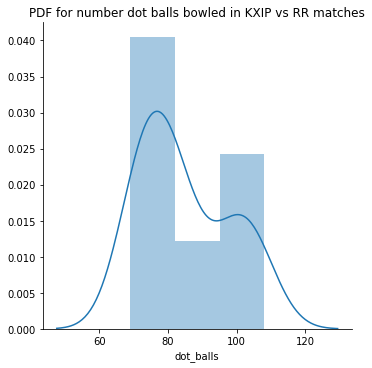

count     19.000000
mean      84.736842
std       12.861839
min       69.000000
25%       75.000000
50%       81.000000
75%       97.000000
max      108.000000
Name: dot_balls, dtype: float64

In [ ]:
#Now plotting PDF 
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df_dotball,size=5) \
   .map(sns.distplot, "dot_balls") \
   .add_legend();

plt.title("PDF for number dot balls bowled in KXIP vs RR matches")
plt.show();

#Printing central tendency and percentile values
df_dotball['dot_balls'].describe()

**Conclusion :-**

*   The Probability is very high for dot balls between 70 to 80 and mean is 84. 
*   75% values are less than 97.

So according to above observation i am predicting in today match they bowl 60-90 dot balls.



### Q5)How many balls will Mohammed Shami take to get his first wicket?

In [ ]:
#Filtering Mohammed Shami all matches in IPL
df_shami = df_deliveries[(df_deliveries['bowler'] == 'Mohammed Shami')]

#Now filtering matches where chahar got atleast 1 wicket in a match
df_chahar_wickets = df_shami[(df_shami['player_dismissed'] != 'No Wicket') & (df_shami['dismissal_kind'] != 'run out')]

total_matches = df_shami['match_id'].nunique()
matches_with_1wicket = df_chahar_wickets['match_id'].nunique()

print("Number of matches played by Mohammad Shami in IPL is : ", total_matches,'\n')
print("Number of matches Mohammad Shami got atleast 1 wicket in match is : ", matches_with_1wicket)

Number of matches played by Mohammad Shami in IPL is :  49 

Number of matches Mohammad Shami got atleast 1 wicket in match is :  30


In [ ]:
#Filtering out Chahar balls excluding No balls and wide balls
#Runouts also not consider under bowlers wickets

df_Shami = df_deliveries[(df_deliveries['bowler'] == 'DL Chahar') & (df_deliveries['dismissal_kind'] != 'run out') &
                          (df_deliveries['wide_runs'] == 0) & (df_deliveries['noball_runs'] == 0)]

balls_list = df_Shami['ball'].to_list()
wickets_list = df_Shami['player_dismissed'].to_list()
matchid_list = df_Shami['match_id'].to_list()

listoflists = []
listoflists.append(matchid_list)
listoflists.append(balls_list)
listoflists.append(wickets_list)

Shami_balls_bowled = []
Shami_matchID = []
balls_bowled = 0

for i in range(len(listoflists[0])-1):
     balls_bowled = balls_bowled + 1
     if listoflists[0][i] != listoflists[0][i-1]:
        balls_bowled = 0
     if listoflists[0][i] not in Shami_matchID and listoflists[2][i] != 'No Wicket':   
            Shami_balls_bowled.append(balls_bowled+1)
            Shami_matchID.append(listoflists[0][i])
            balls_bowled = 0
            
#Printing number of balls bowled by Rasid khan in each match for getting his first wicket
print("Shami balls bowled for 1st wicket  =",Shami_balls_bowled,'\n')
print("Corresponding Matchid           =",Shami_matchID)

Shami balls bowled for 1st wicket  = [1, 7, 12, 5, 9, 13, 11, 1, 15, 2, 9, 24, 6, 11, 16, 9, 24, 10, 5, 2, 9, 14] 

Corresponding Matchid           = [9, 7894, 7910, 7913, 7939, 7945, 7949, 7950, 11141, 11148, 11151, 11309, 11314, 11316, 11324, 11330, 11332, 11335, 11341, 11412, 11414, 11415]


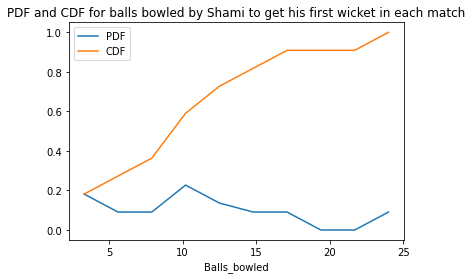

count    22.000000
mean      9.772727
std       6.369061
min       1.000000
25%       5.250000
50%       9.000000
75%      12.750000
max      24.000000
Name: balls_bowled_1stwicket, dtype: float64


In [ ]:
#Converting above two lists into dataframe
df_Shami_ballsbowled_1stwicket =  pd.DataFrame(list(zip(Shami_matchID, Shami_balls_bowled)), columns =['match_id', 'balls_bowled_1stwicket']) 

import numpy as np
import matplotlib.pyplot as plt
leg = ["PDF", "CDF"]
counts, bin_edges = np.histogram(df_Shami_ballsbowled_1stwicket['balls_bowled_1stwicket'], bins=10,
                                density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("PDF and CDF for balls bowled by Shami to get his first wicket in each match")
plt.xlabel('Balls_bowled')
plt.legend(leg)
plt.show();

print(df_Shami_ballsbowled_1stwicket['balls_bowled_1stwicket'].describe())

**Conclusion :-**



*   According to above CDF plot 50% of balls are less than 10. Probability is very high between 10 to 13.
*   He played 49 matches and he got atleast 1 wicket in 30 matches. So he didnt got wicket in 19 matches.

So i am predicting according to 2nd point in today match also he wont get any wicket.

